In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks, peak_widths
from scipy.optimize import curve_fit

In [3]:
Time = 1000

In [4]:
Background = ((pd.read_excel("xlsx/Background.xlsx", skiprows=5, nrows=2049)).to_numpy()).T
Am = ((pd.read_excel("xlsx/Am_241.xlsx", skiprows=5, nrows=2049)).to_numpy()).T
Co = ((pd.read_excel("xlsx/Co_60.xlsx", skiprows=5, nrows=2049)).to_numpy()).T
Cs = ((pd.read_excel("xlsx/Cs_137.xlsx", skiprows=5, nrows=2049)).to_numpy()).T
Eu = ((pd.read_excel("xlsx/Eu_152.xlsx", skiprows=5, nrows=2049)).to_numpy()).T
Na = ((pd.read_excel("xlsx/Na_22.xlsx", skiprows=5, nrows=2049)).to_numpy()).T

Background_error = np.sqrt(Background[1]) / Time
Am_error = np.sqrt(Am[1]) / Time
Co_error = np.sqrt(Co[1]) / Time
Cs_error = np.sqrt(Cs[1]) / Time
Eu_error = np.sqrt(Eu[1]) / Time
Na_error = np.sqrt(Na[1]) / Time

In [5]:
peaks_Na, _ = find_peaks(Na[1], height=50, distance = 50, width = 10) # 511 и 1275 кэВ
k = (1275 - 511) / (peaks_Na[1] - peaks_Na[0])
b = 511 - k * peaks_Na[0]

print(k,b)
k = 0.8
b = -50

1.5249500998003993 140.43712574850298


/var/folders/4q/1cl1jqk55p1cgdmt26q92t6m0000gn/T/ipykernel_24405/2625177515.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


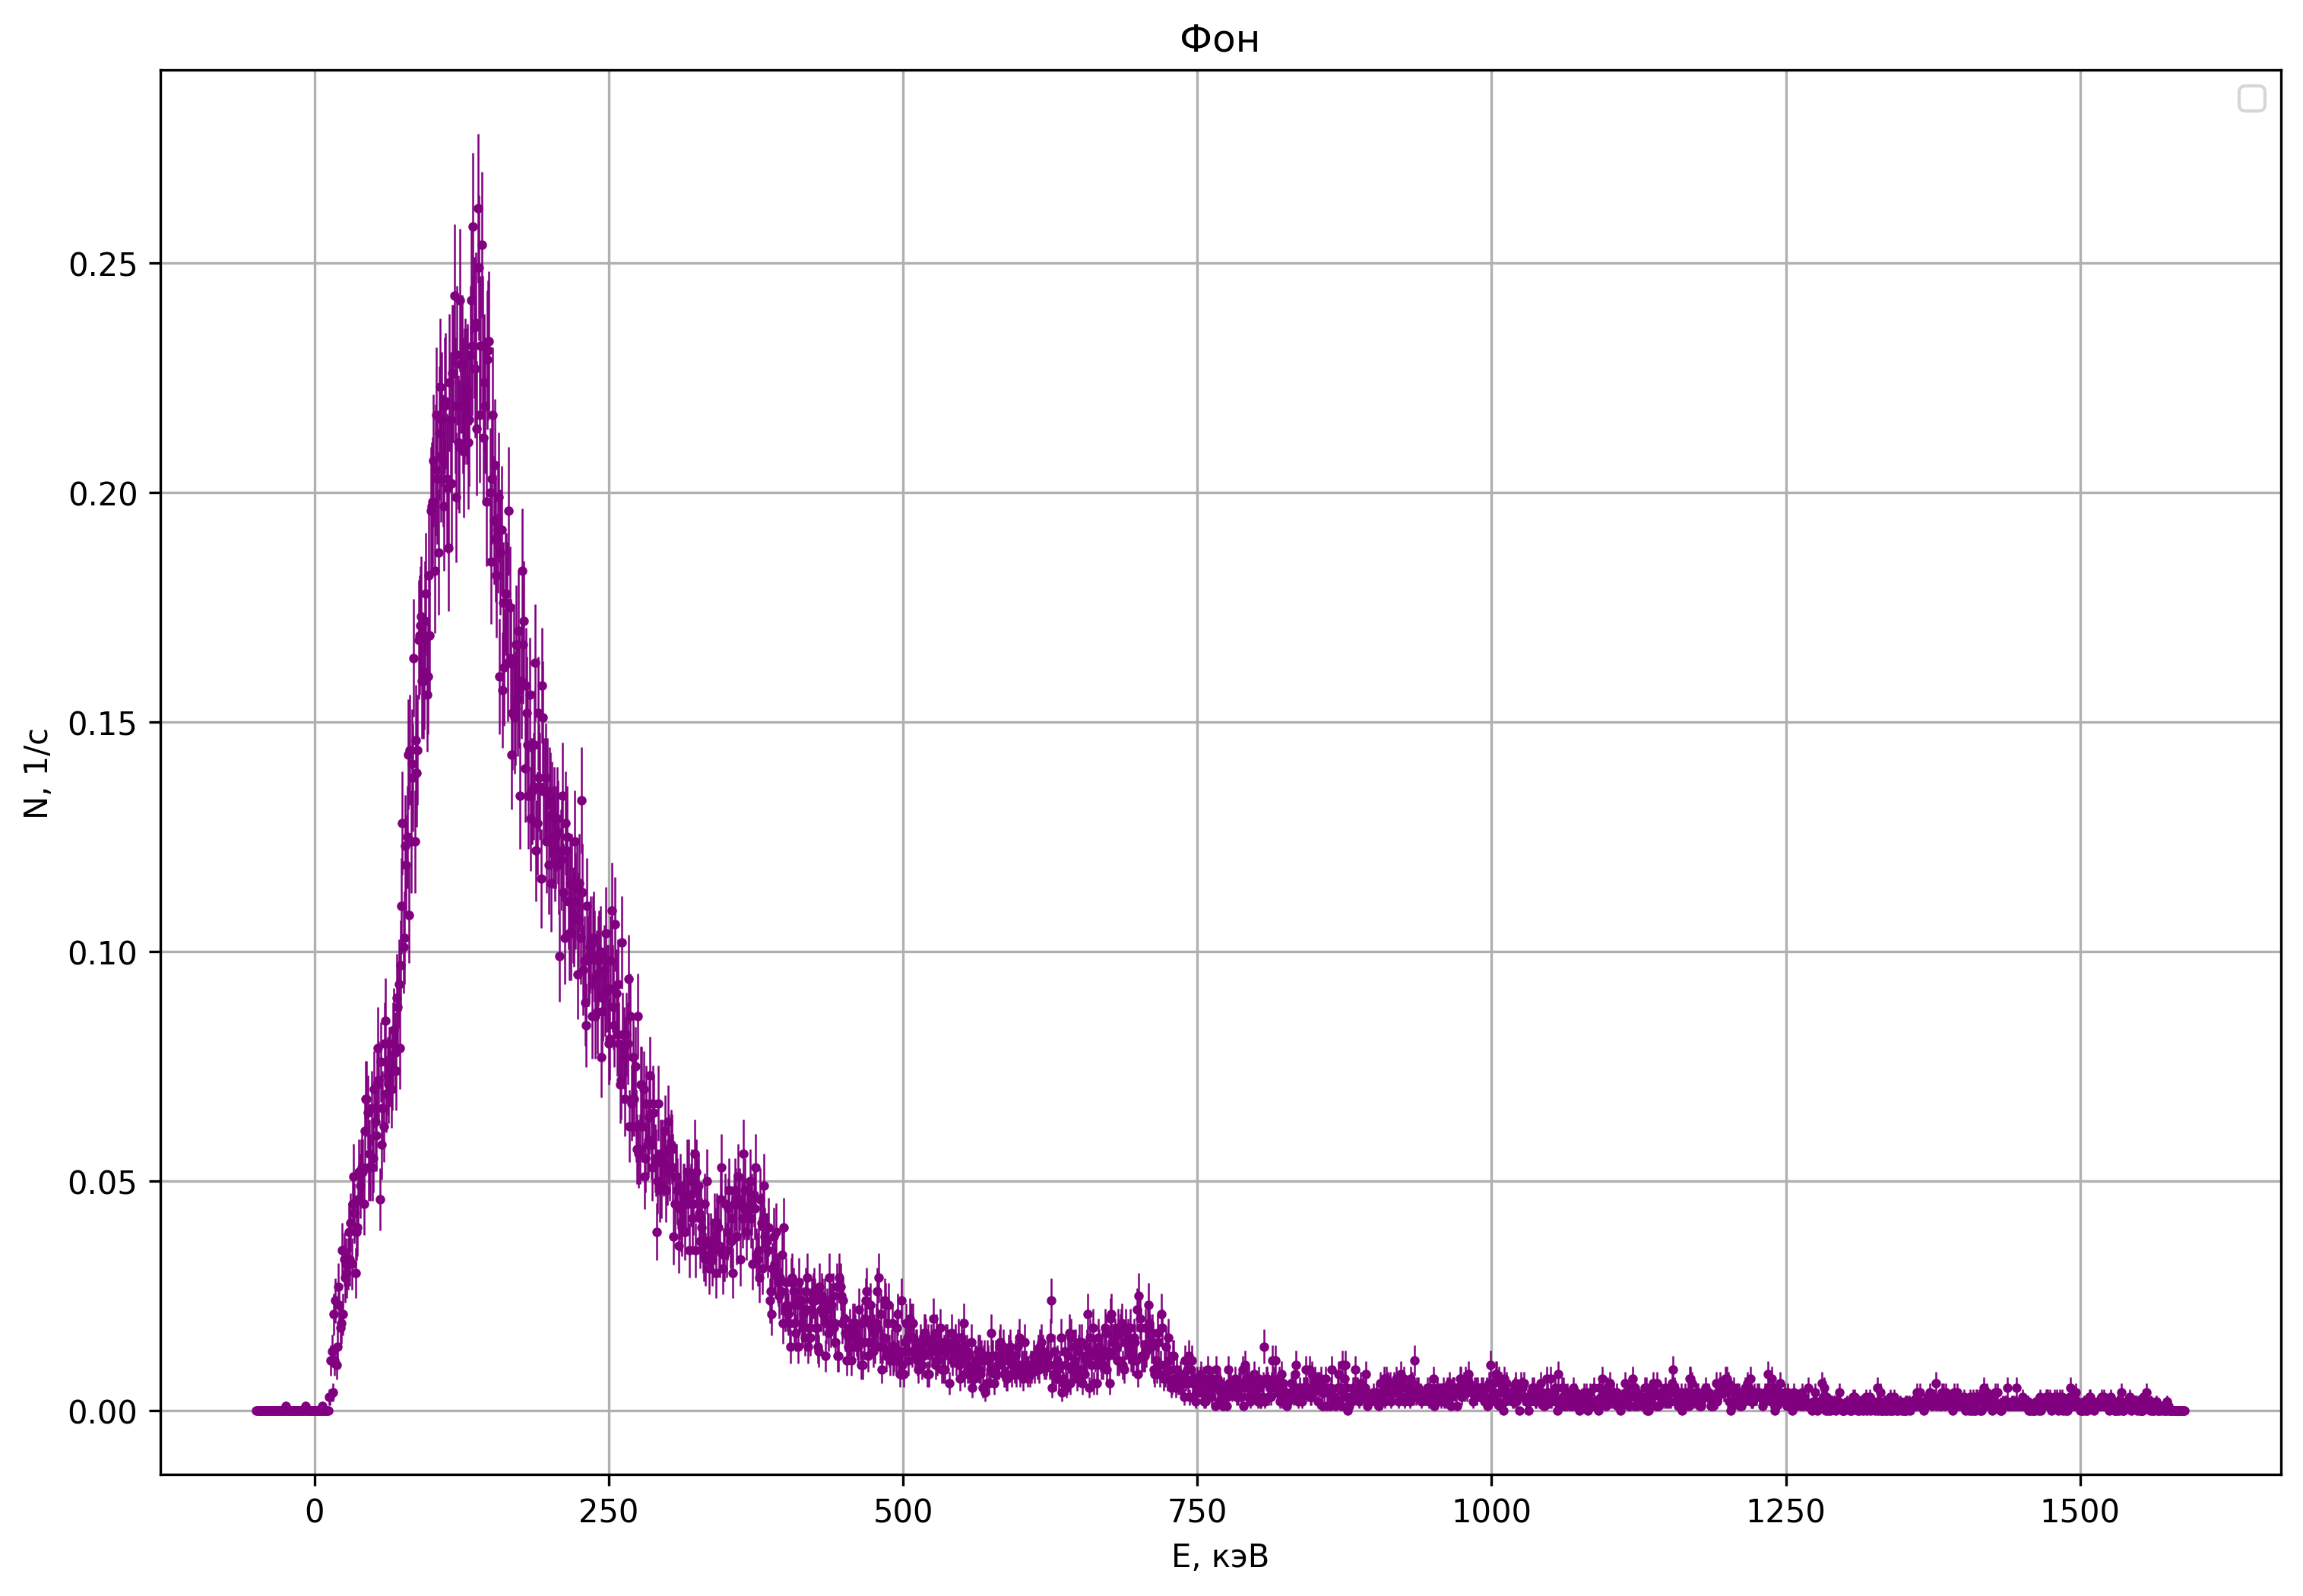

In [6]:
plt.figure(figsize = [12,8], dpi = 300)

plt.errorbar(Background[0] * k + b, Background[1] / Time, marker ='o', linestyle='', color = 'purple', markersize=2, yerr = Background_error, elinewidth = 0.6)


plt.xlabel('E, кэВ')
plt.ylabel('N, 1/с')
plt.title('Фон')


plt.legend()
plt.grid()
plt.savefig("png/Backgroung.png")
plt.show()

/var/folders/4q/1cl1jqk55p1cgdmt26q92t6m0000gn/T/ipykernel_24405/660922235.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


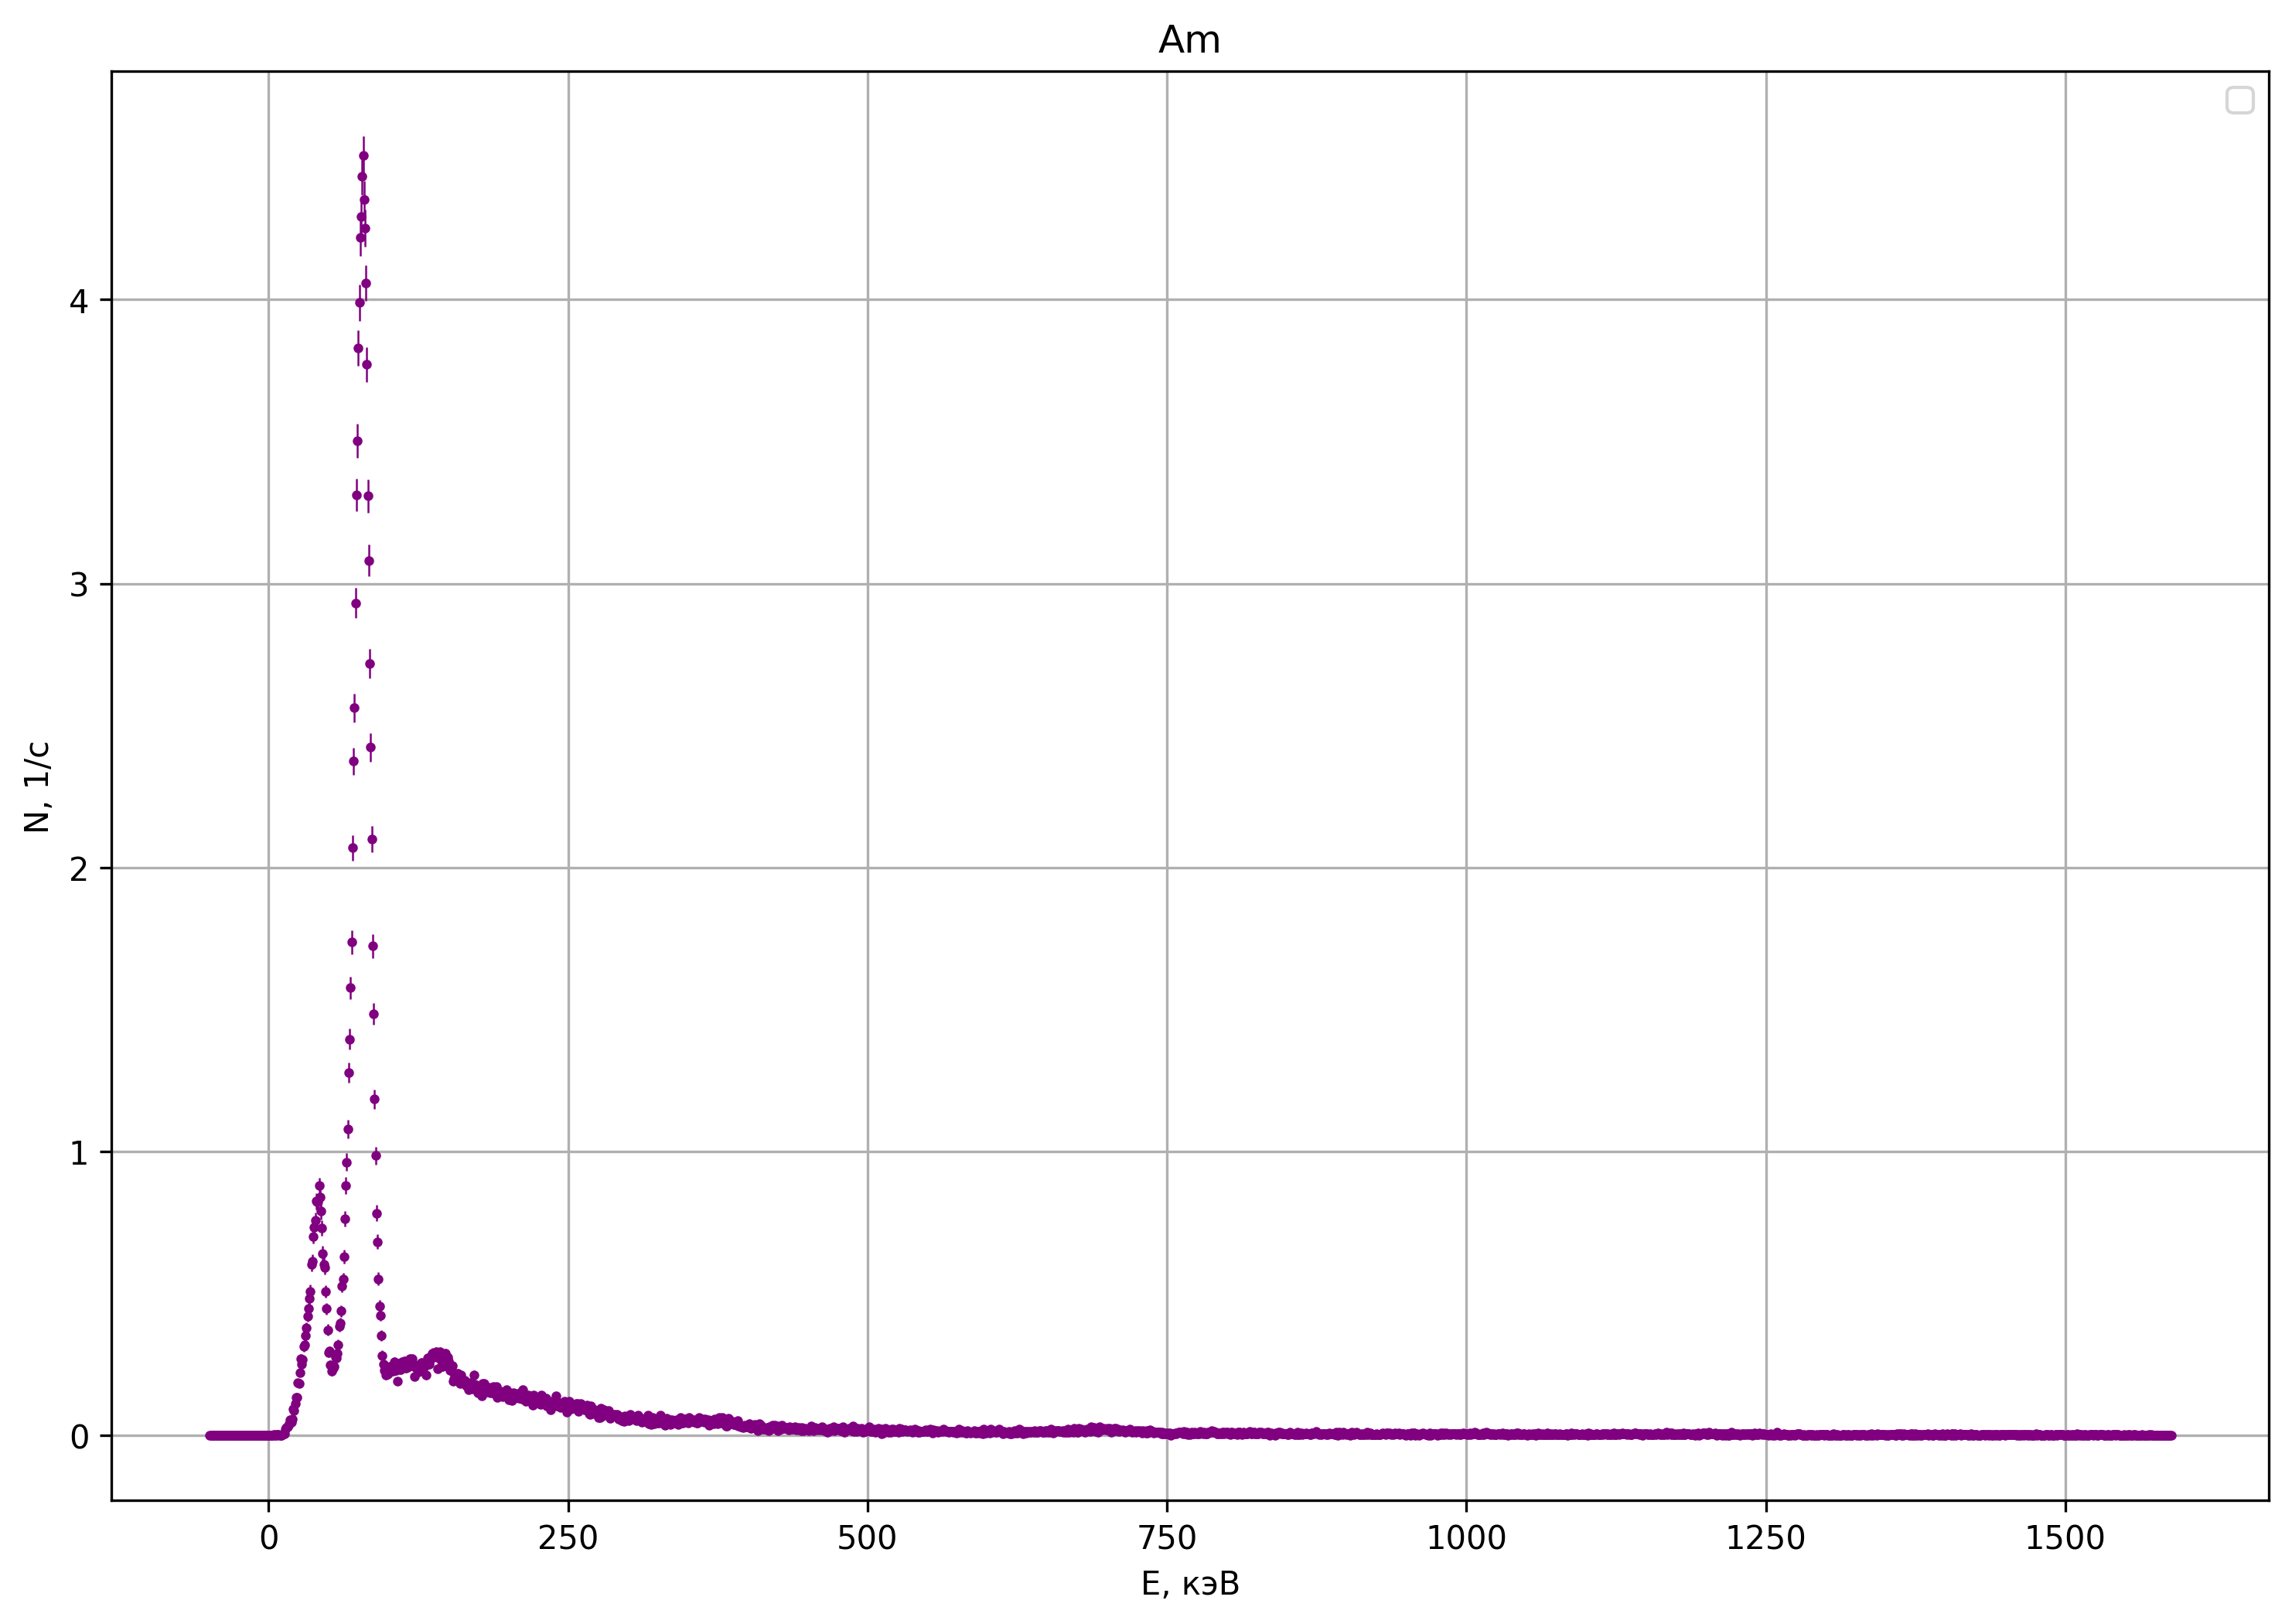

In [7]:
plt.figure(figsize = [12,8], dpi = 300)

plt.errorbar(Am[0] * k + b, Am[1] / Time, marker ='o', linestyle='', color = 'purple', markersize=2, yerr = Am_error, elinewidth = 0.6)


plt.xlabel('E, кэВ')
plt.ylabel('N, 1/с')
plt.title('Am')


plt.legend()
plt.grid()
plt.savefig("png/Am.png")
plt.show()

In [8]:
peaks_Am, _ = find_peaks(Am[1], height=100, distance = 100, width = 10)
widths_Am, _, _, _ = peak_widths(Am[1], peaks_Am, rel_height=0.5)

print(peaks_Am)
print(widths_Am)
print(peaks_Am * k + b)
print(widths_Am * k)

[160]
[18.91666244]
[78.]
[15.13332995]


/var/folders/4q/1cl1jqk55p1cgdmt26q92t6m0000gn/T/ipykernel_24405/2656295951.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


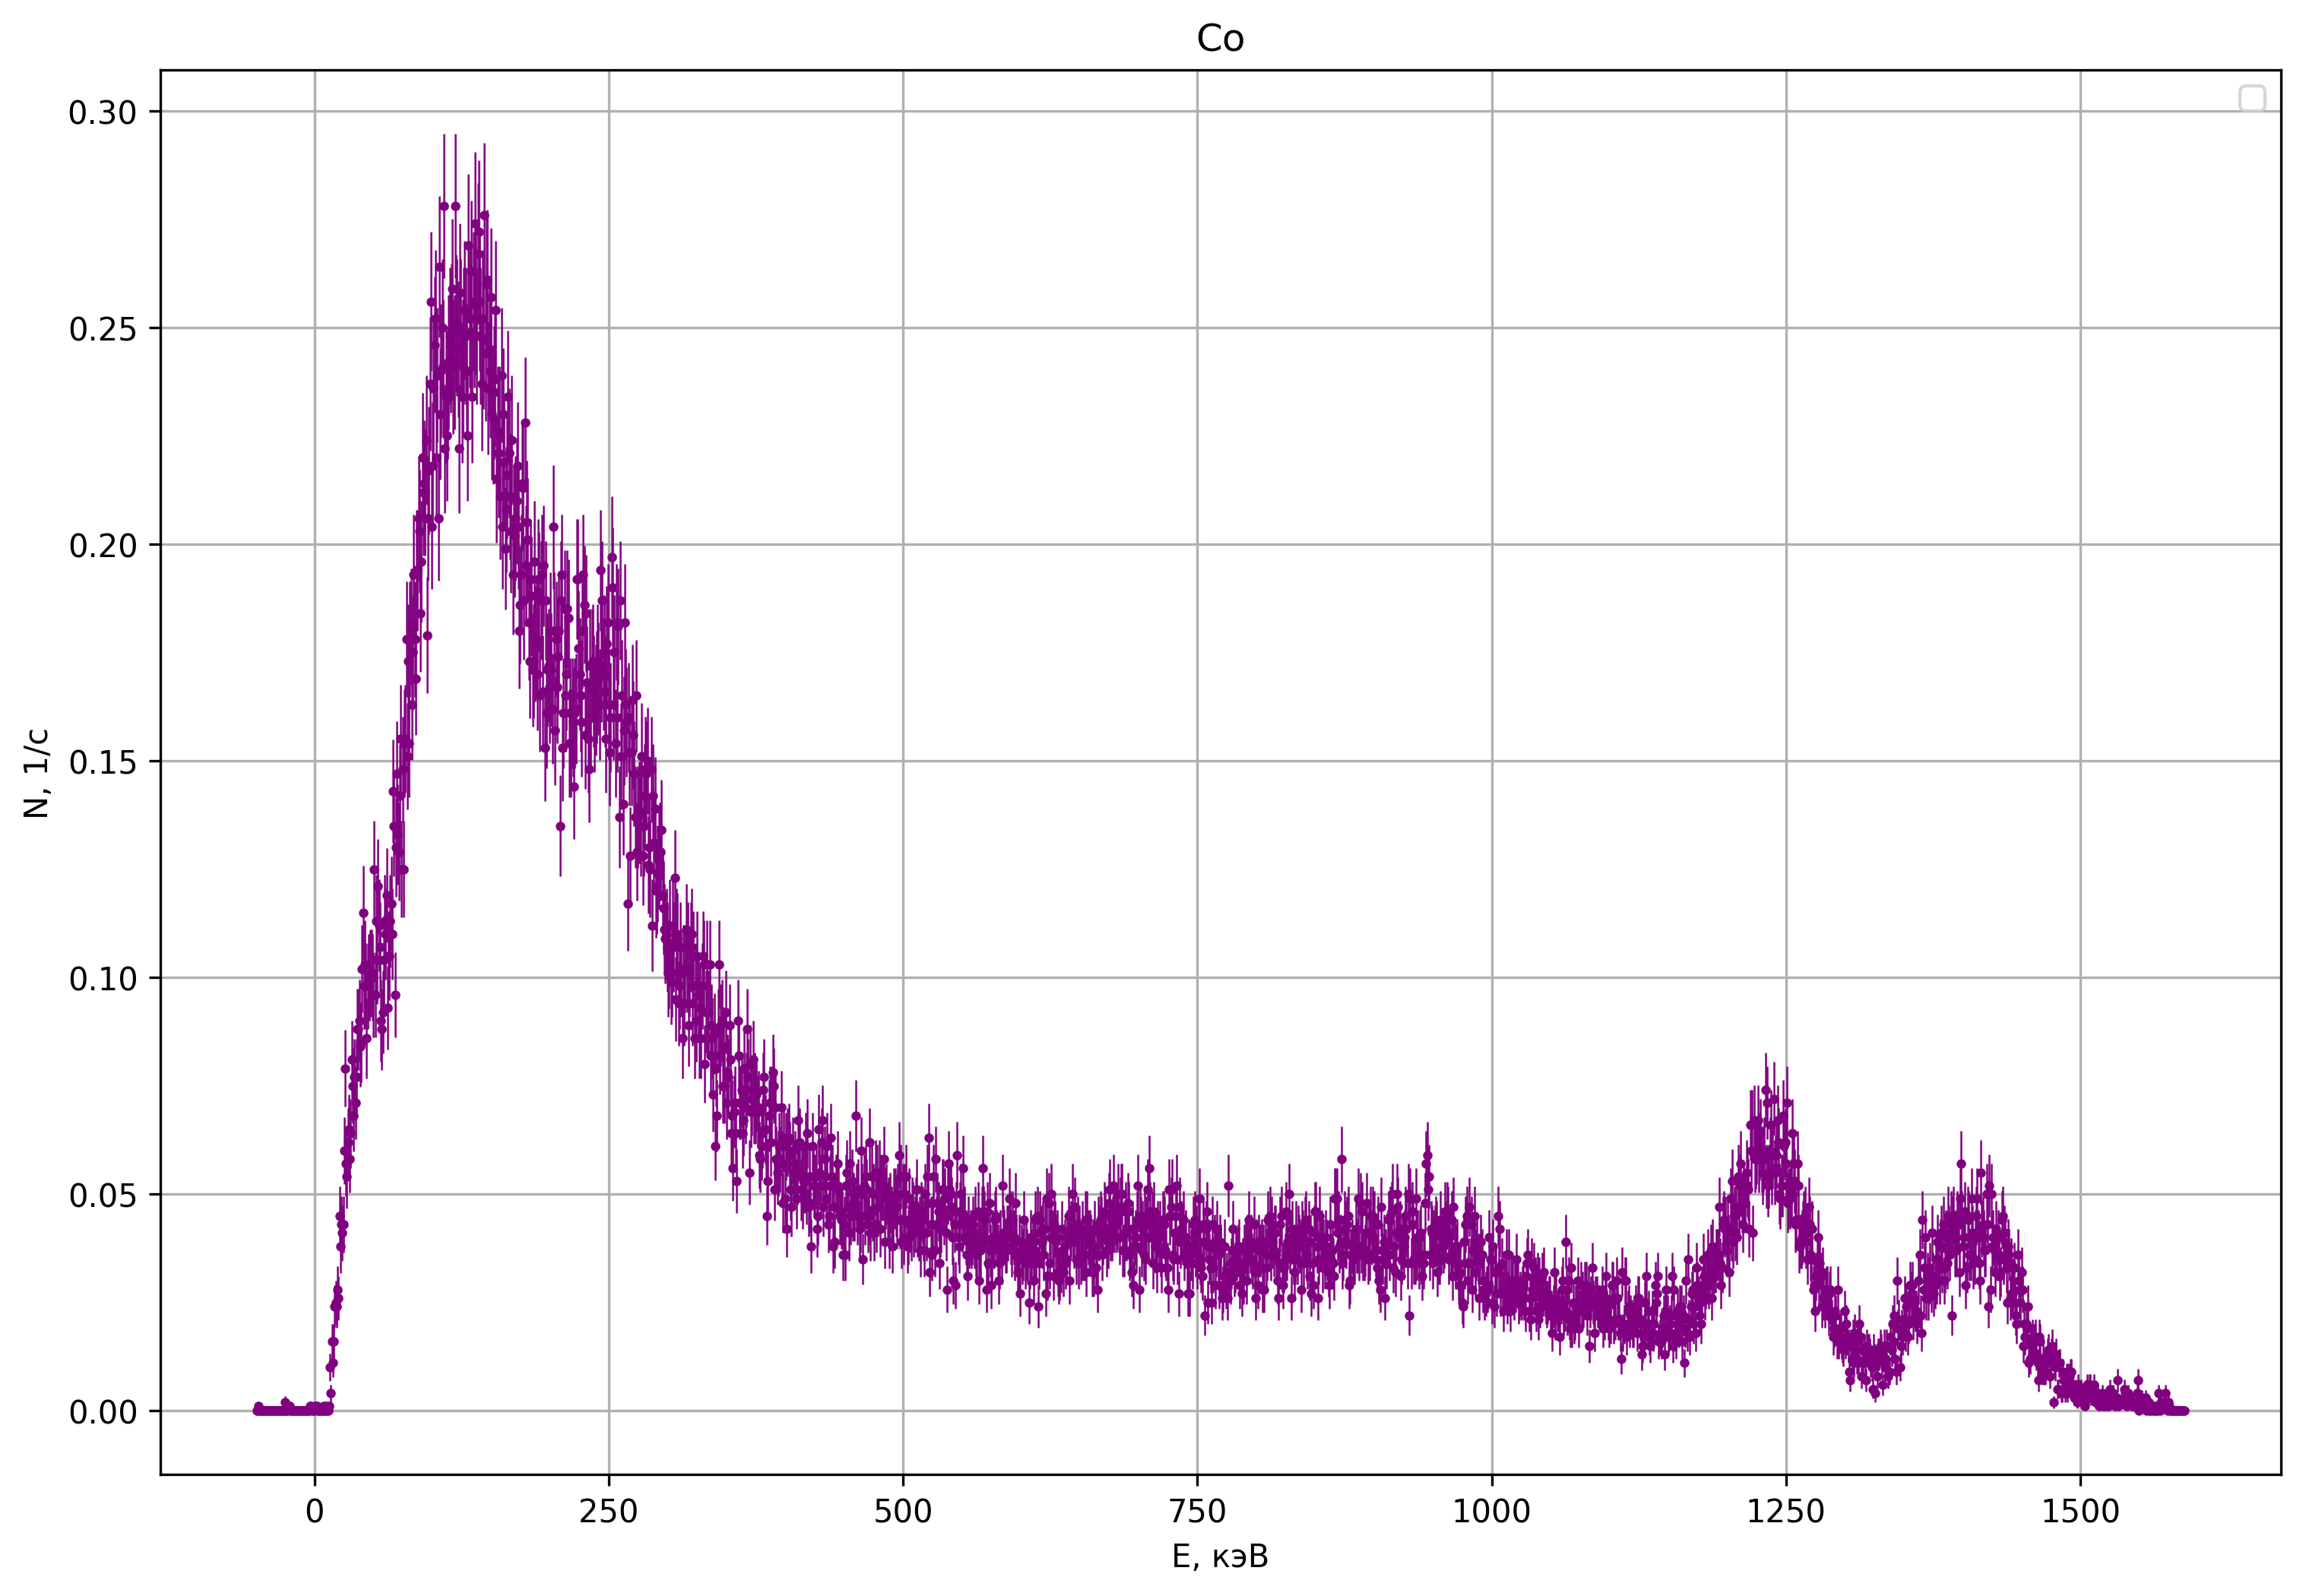

In [9]:
plt.figure(figsize = [12,8], dpi = 300)

plt.errorbar(Co[0] * k + b, Co[1] / Time, marker ='o', linestyle='', color = 'purple', markersize=2, yerr = Co_error, elinewidth = 0.6)


plt.xlabel('E, кэВ')
plt.ylabel('N, 1/с')
plt.title('Co')


plt.legend()
plt.grid()
plt.savefig("png/Co.png")
plt.show()

In [10]:
peaks_Co, _ = find_peaks(Co[1], height=40, distance = 100, width = 10) # 511 и 1275 кэВ
widths_Co, _, _, _ = peak_widths(Co[1], peaks_Co, rel_height=0.5)

print(peaks_Co)
print(widths_Co)
print(widths_Co * k)
print(peaks_Co * k + b)

[ 199 1602 1810]
[165.42835249  48.62087912  14.5070028 ]
[132.34268199  38.8967033   11.60560224]
[ 109.2 1231.6 1398. ]


/var/folders/4q/1cl1jqk55p1cgdmt26q92t6m0000gn/T/ipykernel_24405/2547703317.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


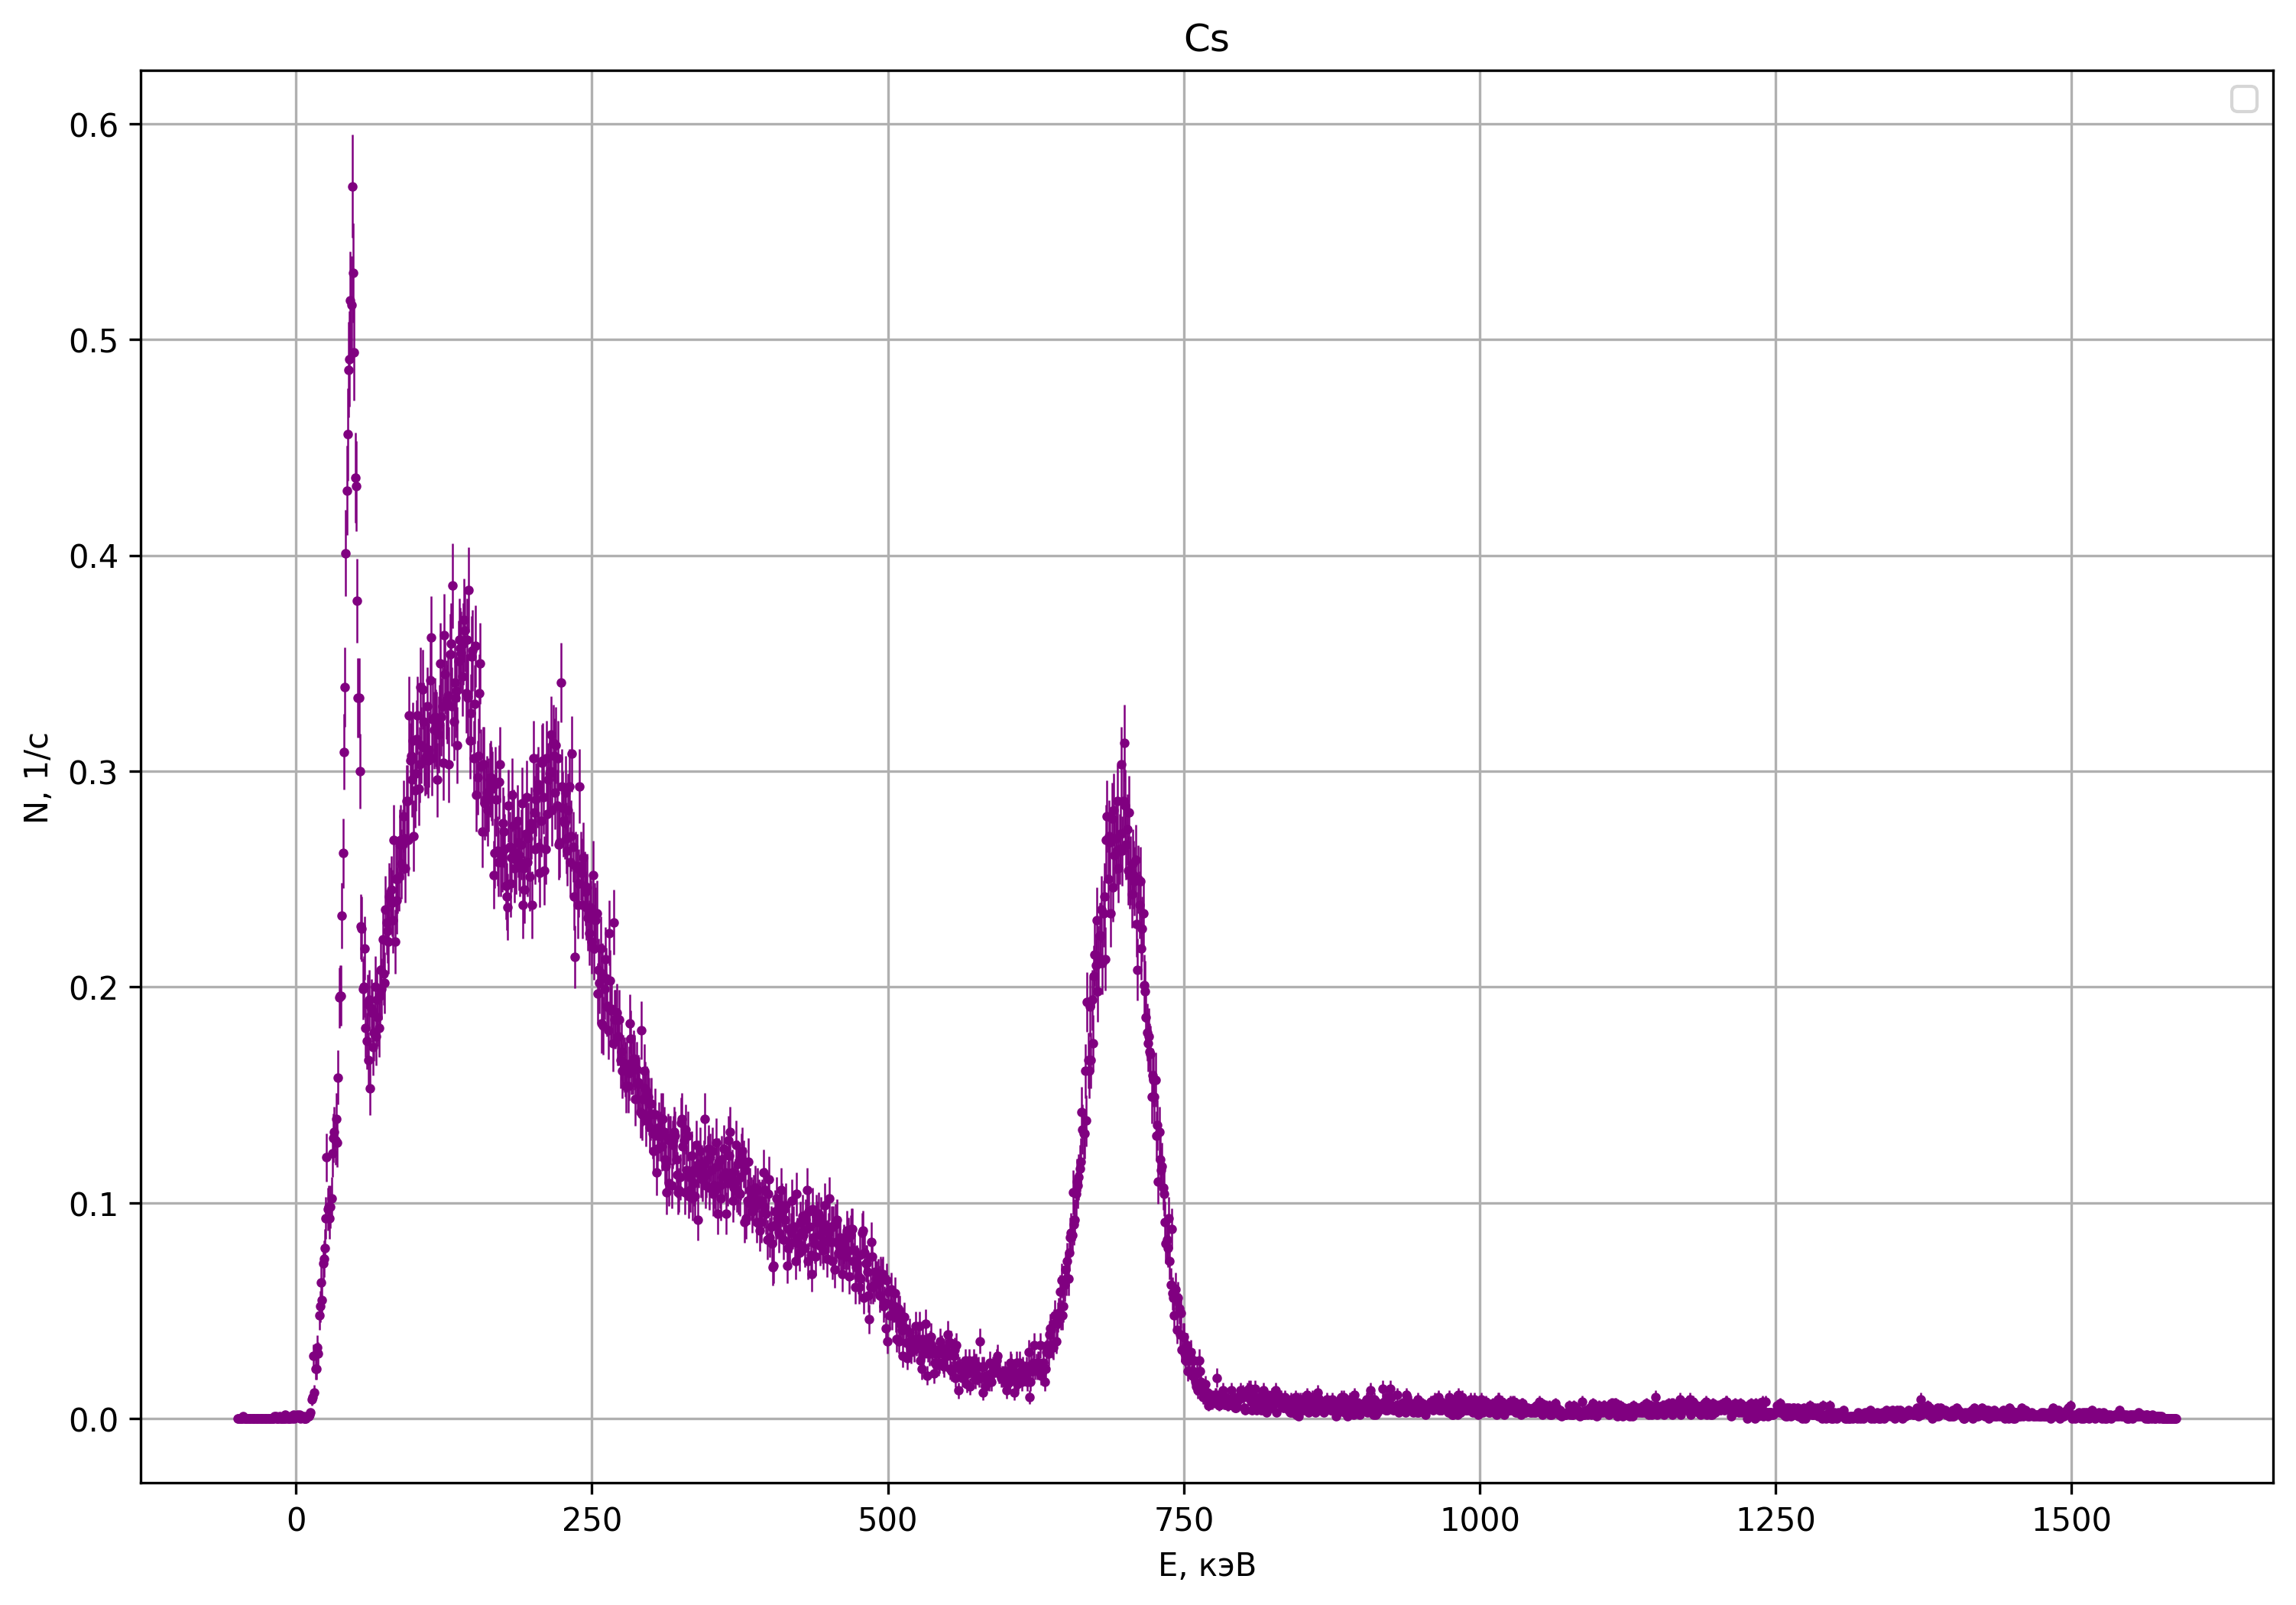

In [11]:
plt.figure(figsize = [12,8], dpi = 300)

plt.errorbar(Cs[0] * k + b, Cs[1] / Time, marker ='o', linestyle='', color = 'purple', markersize=2, yerr = Cs_error, elinewidth = 0.6)


plt.xlabel('E, кэВ')
plt.ylabel('N, 1/с')
plt.title('Cs')


plt.legend()
plt.grid()
plt.savefig("png/Cs.png")
plt.show()

In [12]:
peaks_Cs, _ = find_peaks(Cs[1], height=40, distance = 100, width = 10)
widths_Cs, _, _, _ = peak_widths(Cs[1], peaks_Cs, rel_height=0.5)

print(peaks_Cs)
print(widths_Cs)
print(peaks_Cs * k + b)
print(widths_Cs * k)


[121 227 936]
[17.70138889 89.53663793 65.35833333]
[ 46.8 131.6 698.8]
[14.16111111 71.62931034 52.28666667]


/var/folders/4q/1cl1jqk55p1cgdmt26q92t6m0000gn/T/ipykernel_24405/367903130.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


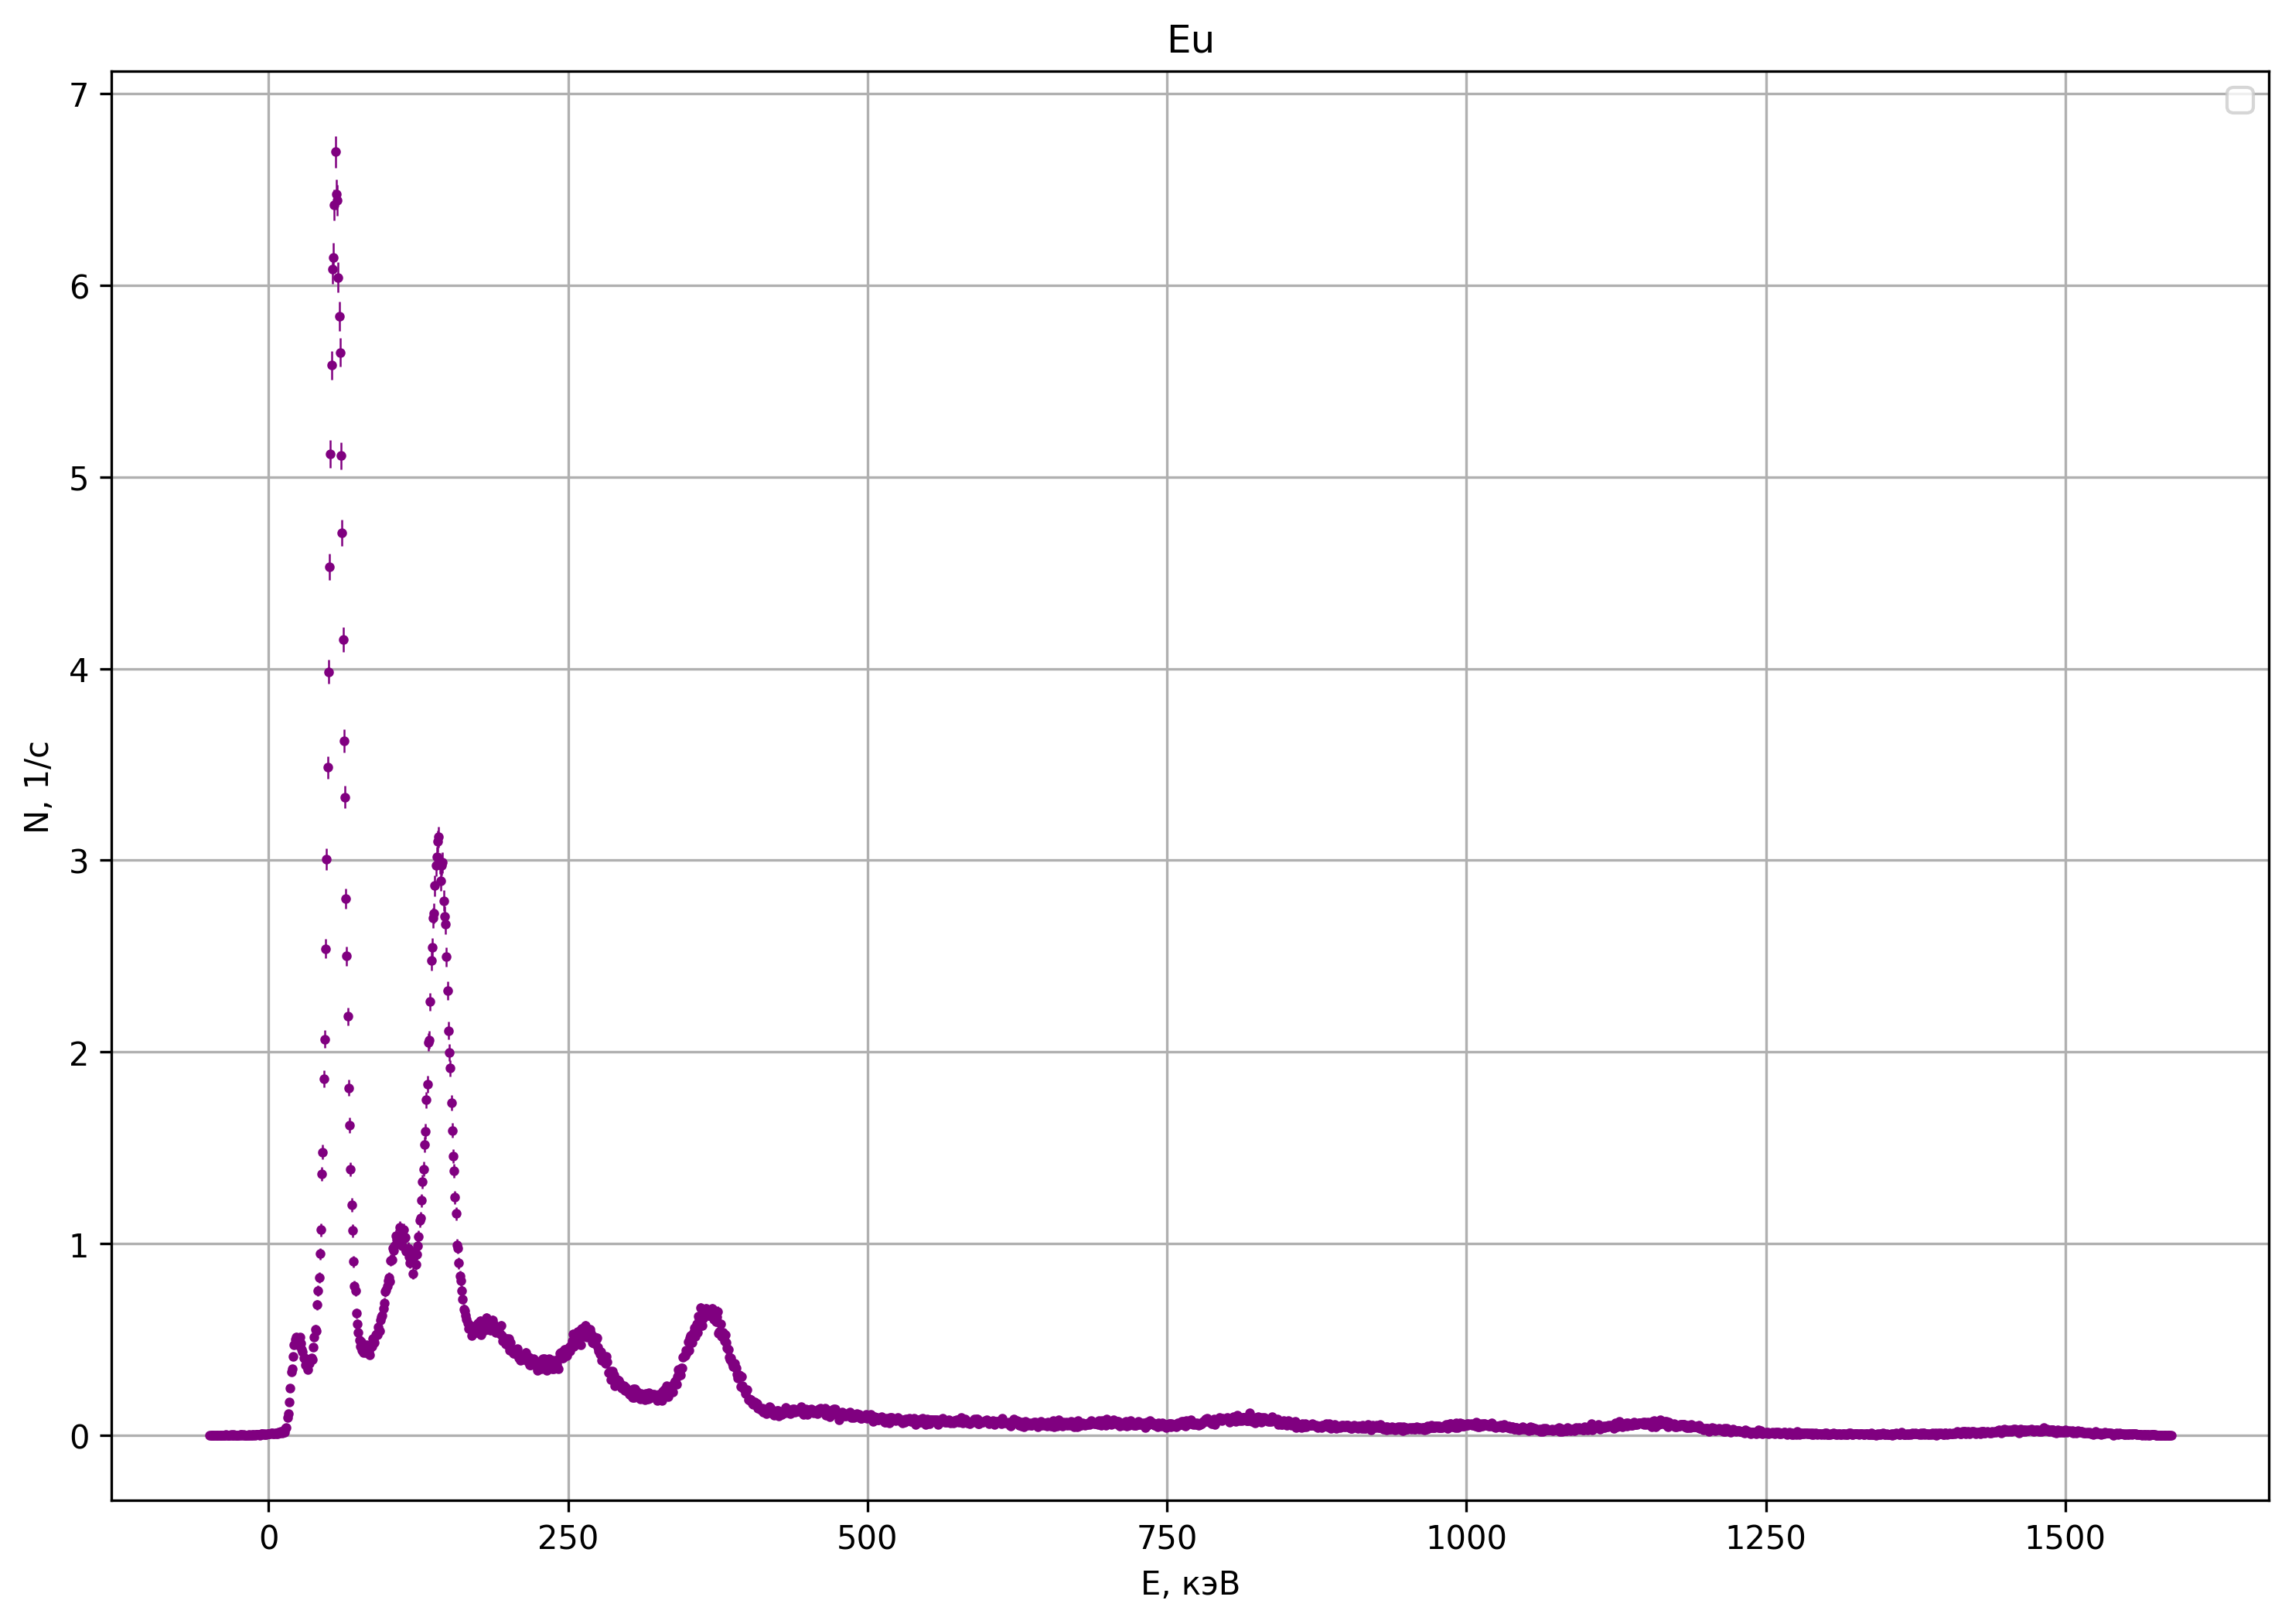

In [13]:
plt.figure(figsize = [12,8], dpi = 300)

plt.errorbar(Eu[0] * k + b, Eu[1] / Time, marker ='o', linestyle='', color = 'purple', markersize=2, yerr = Eu_error, elinewidth = 0.6)


plt.xlabel('E, кэВ')
plt.ylabel('N, 1/с')
plt.title('Eu')


plt.legend()
plt.grid()
plt.savefig("png/Eu.png")
plt.show()

In [14]:
peaks_Eu, _ = find_peaks(Eu[1], height=100, distance = 20, width = 10)
widths_Eu, _, _, _ = peak_widths(Eu[1], peaks_Eu, rel_height=0.5)

print(peaks_Eu)
print(widths_Eu)
print(peaks_Eu * k + b)
print(widths_Eu * k)

[ 131  198  239  392  512 1085]
[18.22712486 14.15903756 25.55277778 28.7        45.30555556 16.76960784]
[ 54.8 108.4 141.2 263.6 359.6 818. ]
[14.58169989 11.32723005 20.44222222 22.96       36.24444444 13.41568627]


/var/folders/4q/1cl1jqk55p1cgdmt26q92t6m0000gn/T/ipykernel_24405/3325115732.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


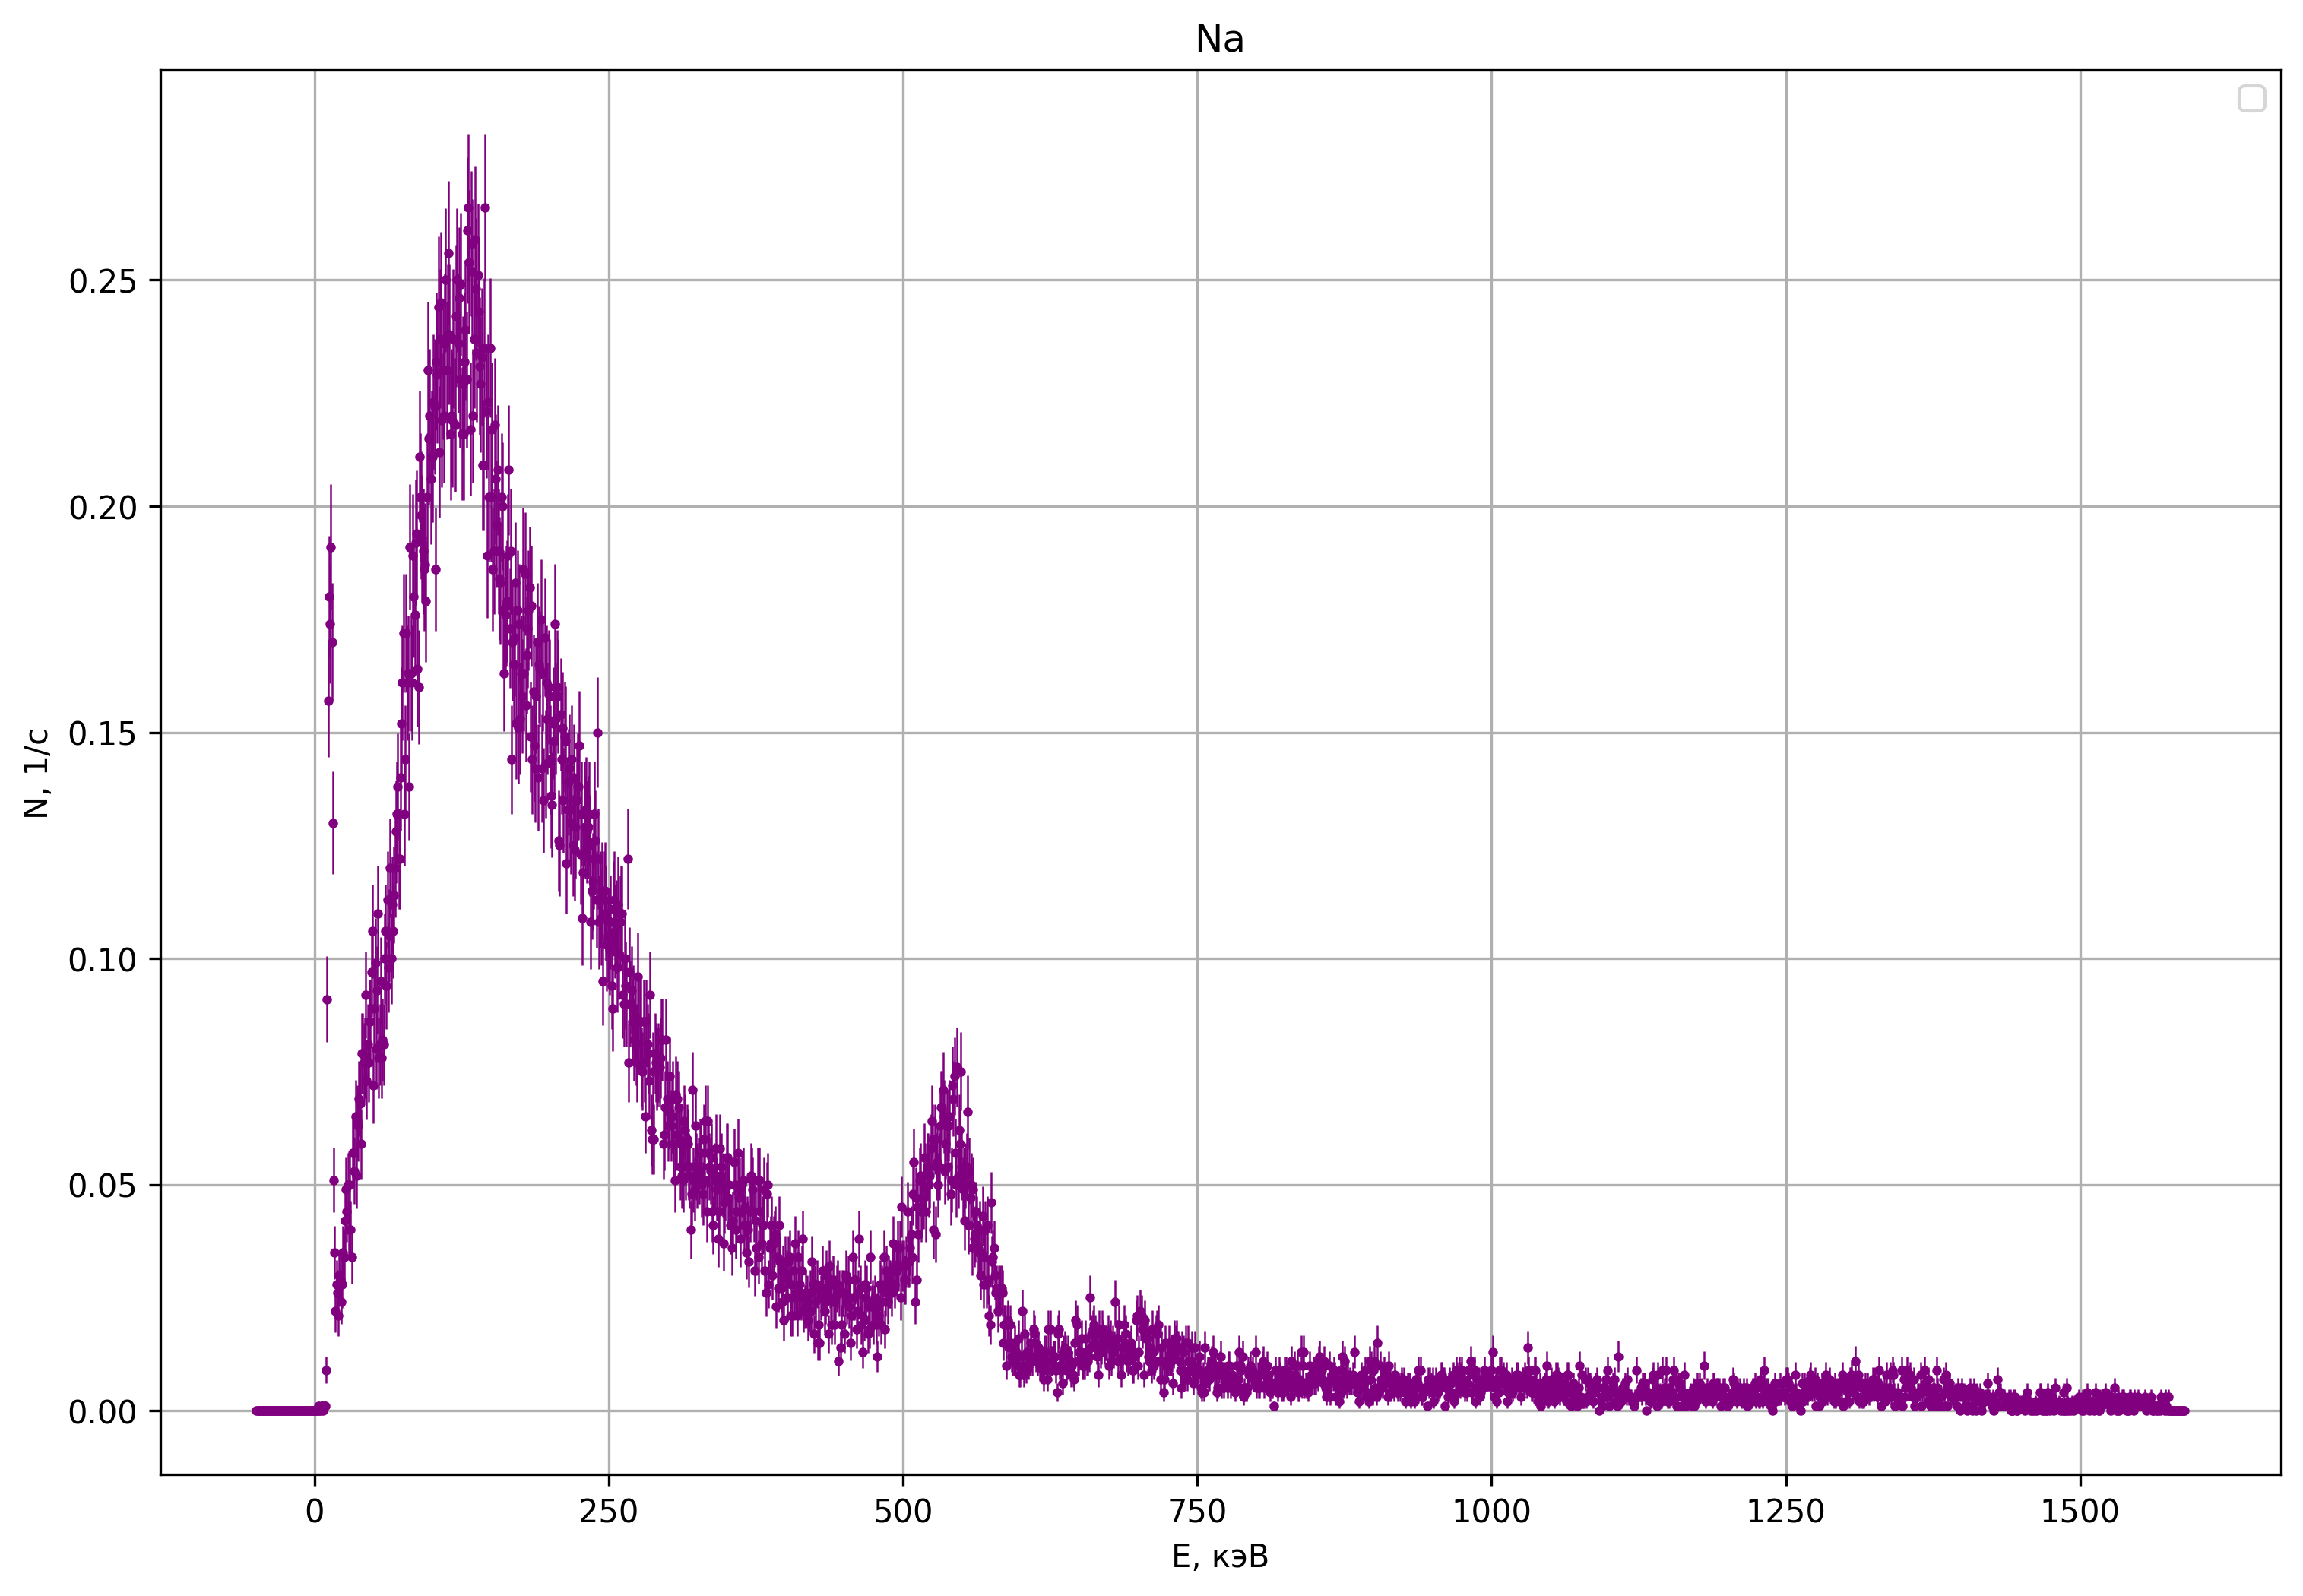

In [15]:
plt.figure(figsize = [12,8], dpi = 300)

plt.errorbar(Na[0] * k + b, Na[1] / Time, marker ='o', linestyle='', color = 'purple', markersize=2, yerr = Na_error, elinewidth = 0.6)


plt.xlabel('E, кэВ')
plt.ylabel('N, 1/с')
plt.title('Na')


plt.legend()
plt.grid()
plt.savefig("png/Na.png")
plt.show()

In [16]:
def linear_model(x, a, b):
    return a * x + b

Параметры аппроксимации: a = 0.00200 ± 0.40168, b = 0.00124 ± 0.70029


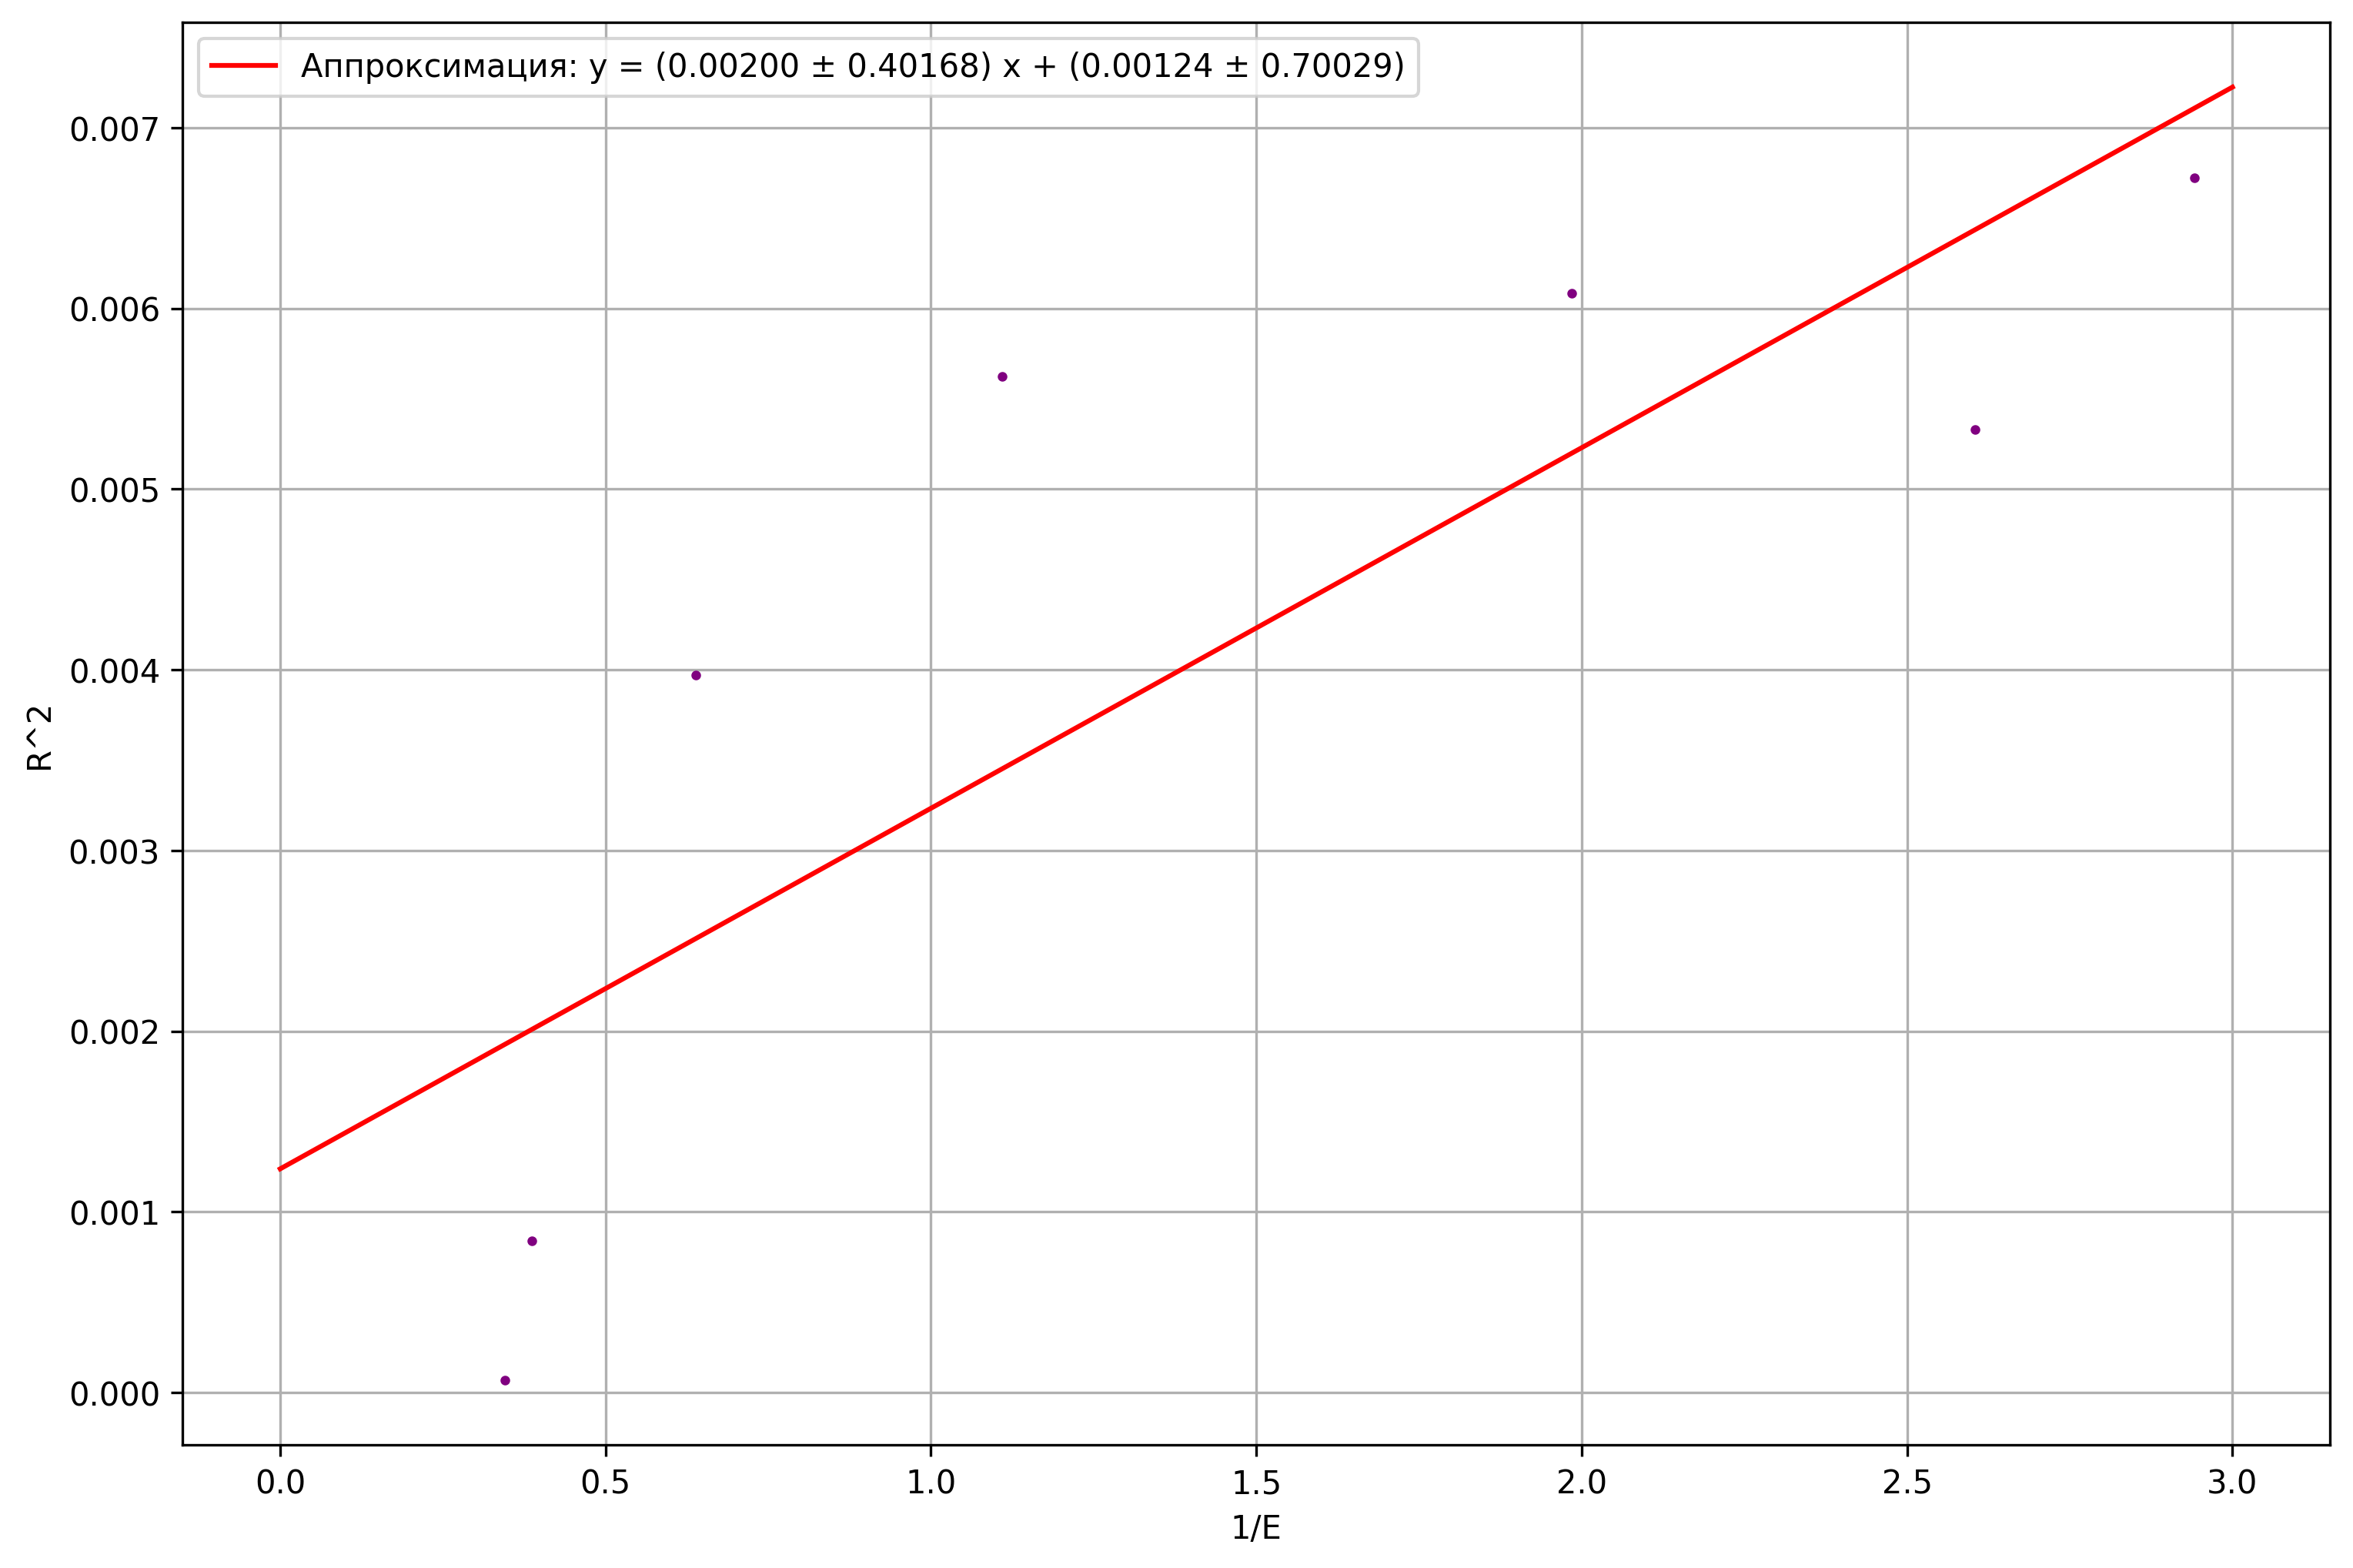

In [17]:
R = [0.029, 0.0082, 0.063, 0.073, 0.082, 0.078, 0.075]
E = [2.583, 2.9, 1.567, 0.384, 0.34, 0.504, 0.901]

R_sq = [r*r for r in R]
one_E = [1 / e for e in E]

params, covariance = curve_fit(linear_model, one_E, R_sq, absolute_sigma=True)

a, b = params
param_errors = np.sqrt(np.diag(covariance))
confidence_interval = 1.06 * param_errors 

print(f"Параметры аппроксимации: a = {a:.5f} ± {confidence_interval[0]:.5f}, b = {b:.5f} ± {confidence_interval[1]:.5f}")

x_fit = np.linspace(0, 3, 20)
y_fit = linear_model(x_fit, a, b)

 


plt.figure(figsize = [12,8], dpi = 300)

plt.plot(one_E, R_sq, marker ='o', linestyle='', color = 'purple', markersize=2)
plt.plot(x_fit, y_fit, color='red', label=f'Аппроксимация: y = ({a:.5f} ± {confidence_interval[0]:.5f}) x + ({b:.5f} ± {confidence_interval[1]:.5f})')


plt.xlabel('1/E')
plt.ylabel('R^2')


plt.legend()
plt.grid()
plt.savefig("png/apr.png")
plt.show()
